# Drowsiness detection using YOLO

### Import libraries

In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

### Import the data 

In [3]:
folder = 'dd_dataset'
classes = ['open_eyes','closed_eyes']

train_data = []

for i in classes:
    path = os.path.join(folder,i)
    class_num = classes.index(i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        rgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        new_array = cv2.resize(rgb,(224,224))
        train_data.append([new_array,class_num])

In [4]:
print(len(train_data))

3000


In [5]:
import random

random.shuffle(train_data)

In [6]:
x = []
y = []

for i,j in train_data:
    x.append(i)
    y.append(j)
    

x = np.array(x).reshape(-1,224,224,3)

In [7]:
x.shape

(3000, 224, 224, 3)

In [8]:
# normalize  the data

x = x/255.0

In [9]:
y = np.array(y)

In [10]:
# Pickle is used for serialization

import pickle 

pickle_out = open('x.pickle','wb')
pickle.dump(x,pickle_out) # This is used to serialize an object hierarchy
pickle_out.close

pickle_out = open('y.pickle', 'wb')
pickle.dump(y,pickle_out)
pickle_out.close

<function BufferedWriter.close>

In [11]:
pickle_in = open('x.pickle','rb')
x = pickle.load(pickle_in)

pickle_in = open('y.pickle','rb')
y = pickle.load(pickle_in)

### Training the model

In [12]:
from tensorflow import keras
from tensorflow.keras import layers


In [13]:
model = tf.keras.applications.mobilenet.MobileNet()

In [14]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

### Performing transfer learning

In [15]:
base_input = model.layers[0].input

In [16]:
base_output = model.layers[-4].output

In [17]:
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_op = layers.Activation('sigmoid')(final_output)

In [19]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

### Settings for binary Classification

In [20]:
new_model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [21]:
new_model.fit(x,y,epochs=5, validation_split= 0.1)

Epoch 1/5
85/85 [==============================] - 826s 10s/step - loss: 4.1916 - accuracy: 0.7178 - val_loss: 5.1983 - val_accuracy: 0.6000
Epoch 2/5
85/85 [==============================] - 742s 9s/step - loss: 5.0273 - accuracy: 0.6663 - val_loss: 8.0724 - val_accuracy: 0.4767
Epoch 3/5
85/85 [==============================] - 710s 8s/step - loss: 8.2837 - accuracy: 0.4537 - val_loss: 7.6927 - val_accuracy: 0.4933
Epoch 4/5
85/85 [==============================] - 1053s 12s/step - loss: 6.4252 - accuracy: 0.5759 - val_loss: 5.5560 - val_accuracy: 0.6367
Epoch 5/5
85/85 [==============================] - 998s 12s/step - loss: 2.6916 - accuracy: 0.8170 - val_loss: 3.4469 - val_accuracy: 0.7767


### Checking the network for predictions

In [20]:
img = cv2.imread('closed-eye.png',cv2.IMREAD_GRAYSCALE)
rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new = cv2.resize(rgb , (224,224))

In [21]:
x_input = np.array(new).reshape(1,224,224,3)

In [22]:
x_input.shape

(1, 224, 224, 3)

In [23]:
x_input = x_input/255.0

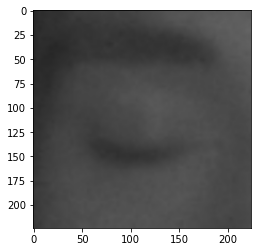

In [24]:
plt.imshow(new)

In [25]:
prediction = new_model.predict(x_input)

1/1 [==============================] - 2s 2s/step


In [26]:
prediction

array([[1.6495576]], dtype=float32)

In [27]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [28]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [29]:
img = cv2.imread('R.jpg')

In [30]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

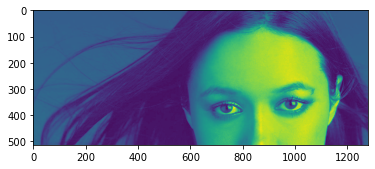

In [31]:
plt.imshow(gray)

In [32]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [33]:
for x,y,w,h in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h), (0,255,0),2)

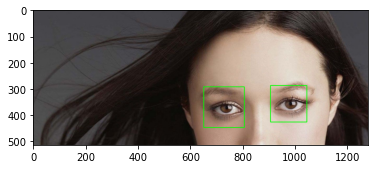

In [34]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [35]:
# Cropping the eye 
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print('eyes are not detected')
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh,ex:ex+ew]
            

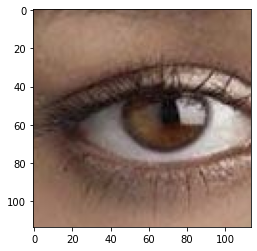

In [36]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [37]:
eyes_roi.shape

(114, 114, 3)

In [38]:
final_image = cv2.resize(eyes_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [39]:
final_image.shape

(1, 224, 224, 3)

In [40]:
predictions = new_model.predict(final_image)

1/1 [==============================] - 0s 353ms/step


In [41]:
if predictions >0:
    print(predictions[0][0])

negative value => Open eyes
positive value => Closed eyes

In [47]:
path = 'haarcascade_frontalface_default.xml'
faceCascade = cv2.BaseCascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('cannot open webcam')

while True:
    ret,frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, 1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print('eyes are not detected')
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey:ey+ eh, ex:ex+ew]
                
    final_image = cv2.resize(eyes_roi,(224,224,))
    final_image = np.expand_dims(final_image,axis = 0)
    final_image = final_image/255.0
    
    predictions = new_model.predict(final_image)
    if (predictions[0][0]<0.3):
        status = "Open Eyes"
    else:
        status = "Closed Eyes"
    
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame,status,(50,50),font,3,
                (0,0,255),2,cv2.LINE_4)
    
    cv2.imshow('Driver Drowsiness detection',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

eyes are not detected
1/1 [==============================] - 0s 122ms/step
eyes are not detected
eyes are not detected
1/1 [==============================] - 0s 114ms/step
eyes are not detected
1/1 [==============================] - 0s 111ms/step
eyes are not detected
1/1 [==============================] - 0s 121ms/step
eyes are not detected
1/1 [==============================] - 0s 112ms/step
eyes are not detected
eyes are not detected
1/1 [==============================] - 0s 114ms/step
eyes are not detected
eyes are not detected
1/1 [==============================] - 0s 110ms/step
eyes are not detected
1/1 [==============================] - 0s 109ms/step
eyes are not detected
1/1 [==============================] - 0s 115ms/step
eyes are not detected
1/1 [==============================] - 0s 129ms/step
eyes are not detected
1/1 [==============================] - 0s 127ms/step
eyes are not detected
eyes are not detected
1/1 [==============================] - 0s 110ms/step
eyes are not

KeyboardInterrupt: 

: 